# 🌎 Global Solution | Dynamic Programming

## 🧑‍💻 Integrantes

- Nicolas Haubricht Hainfellner - RM 556259
- Lucas henzo Ide Yuki - RM 554865


## ➡️  1. Contextualização e Iniciativa

Este projeto visa desenvolver um **Motor de Orientação de Habilidades (MOH)**, conforme proposto no documento `GS_Nov25_DProg_AM.pdf`. A iniciativa é crítica para guiar o **Profissional do Futuro** na aquisição de uma sequência de habilidades que maximize o valor de carreira e a adaptabilidade em um mercado em constante mudança.

Os desafios propostos exigem a aplicação de algoritmos de otimização e análise de dados, incluindo Programação Dinâmica, simulação de Monte Carlo, busca exaustiva e algoritmos de ordenação, para lidar com incerteza, restrições múltiplas e dependências de pré-requisitos.

## ➡️ 2. Arquitetura e Modularização

O projeto foi estruturado de forma **modularizada** para garantir a clareza, a manutenibilidade e a aplicação das boas práticas de programação. A arquitetura é baseada na separação de responsabilidades:

| Módulo | Responsabilidade | Boas Práticas Aplicadas |
| :--- | :--- | :--- |
| `data.py` | Definição da Estrutura de Dados Mestre (Habilidades). | Centralização de dados, funções de acesso simples. |
| `src/graph_utils.py` | Validação do Grafo de Pré-requisitos (Ciclos e Nós Órfãos). | **Recursão** (DFS), Tratamento de Exceções. |
| `src/challenge_X.py` | Lógica de Negócio e Solução para cada Desafio. | **Modularização**, Funções puras, Uso de Constantes. |
| `src/visual_utils.py` | Geração de Gráficos para visualização dos resultados. | Separação da lógica de apresentação. |

Esta abordagem permite que cada desafio seja resolvido de forma independente, facilitando testes e futuras modificações.

## 📚 3. Importação e Escolha de Funções

As soluções utilizam técnicas avançadas de otimização e programação, conforme solicitado:

| Técnica | Módulos de Aplicação | Justificativa |
| :--- | :--- | :--- |
| **Memoização (`@lru_cache`)** | `challenge_1.py`, `challenge_5.py` | Essencial para a Programação Dinâmica (DP), armazena resultados de subproblemas para evitar recálculo, otimizando a performance. |
| **Recursão** | `graph_utils.py`, `challenge_1.py`, `challenge_4.py`, `challenge_5.py` | Usada na DFS para detecção de ciclos, na DP (top-down) e no algoritmo Merge Sort (divisão e conquista). |
| **List Comprehension** | Todos os módulos | Utilizada para criar listas de forma concisa e legível, como na filtragem de pré-requisitos e na simulação de Monte Carlo. |

Abaixo, importamos todas as funções necessárias e realizamos a validação inicial do grafo.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Configuração inicial: Adiciona o diretório pai ao path para importar os módulos
import sys
import os
import json
import time
sys.path.append(os.path.abspath('..'))
import matplotlib.pyplot as plt

# Importa módulos de dados e utilidades
from dynamic_programming_project.data import get_habilidades
from dynamic_programming_project.src.graph_utils import validate_graph, GraphValidationError
from dynamic_programming_project.src.visual_utils import plot_monte_carlo_results, plot_cost_comparison, plot_greedy_vs_optimal

# Importa módulos dos desafios
from dynamic_programming_project.src.challenge_1 import solve_challenge_1
from dynamic_programming_project.src.challenge_2 import solve_challenge_2
from dynamic_programming_project.src.challenge_3 import solve_challenge_3
from dynamic_programming_project.src.challenge_4 import solve_challenge_4
from dynamic_programming_project.src.challenge_5 import solve_challenge_5

print("--- Validação Inicial do Grafo de Pré-requisitos ---")
try:
    orphan_res, cycle_res = validate_graph()
    print(f"Nós Órfãos: {orphan_res}")
    print(f"Ciclos: {cycle_res}")
    print("Grafo validado com sucesso. Podemos prosseguir com os desafios.")
except GraphValidationError as e:
    print(f"ERRO DE VALIDAÇÃO CRÍTICO: {e}")
    print("A execução dos desafios será interrompida.")
    # Se houver erro, podemos interromper a execução do notebook aqui

--- Validação Inicial do Grafo de Pré-requisitos ---
Nós Órfãos: Nenhum nó órfão detectado.
Ciclos: Nenhum ciclo detectado.
Grafo validado com sucesso. Podemos prosseguir com os desafios.


## 🖥️ 4. Desafios

### Desafio 1: Caminho de Valor Máximo (DP e Monte Carlo)

**Objetivo:** Encontrar a sequência de habilidades que maximize o Valor Esperado sob restrições de Tempo (T ≤ 350h) e Complexidade (C ≤ 30), utilizando Programação Dinâmica com Memoização para a solução determinística e Simulação de Monte Carlo para a incerteza.

=== RESULTADO DETERMINÍSTICO ===
Status: Falha: Restrições excedidas
Valor Total: 0
Tempo Total: 450
Complexidade Total: 31
Caminho (Conjunto): ['S1', 'S3', 'S4', 'S6']

=== RESULTADO MONTE CARLO ===
Valor Esperado: 28.00
Desvio Padrão: 0.86
Nº de Cenários: 1000


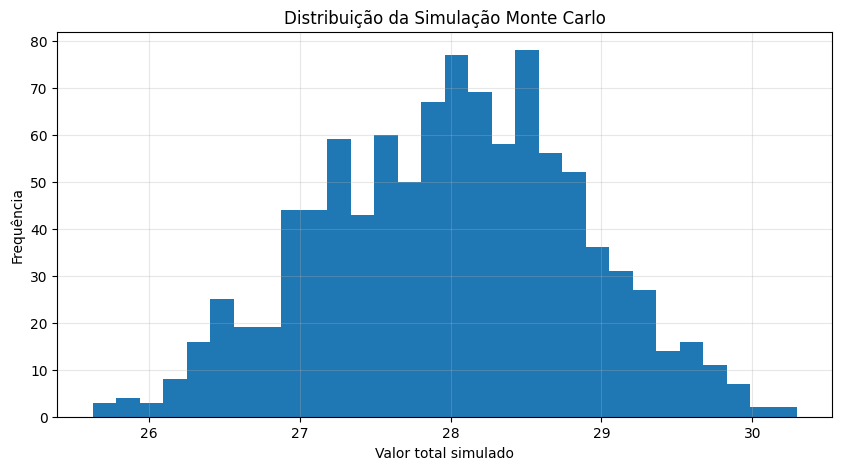

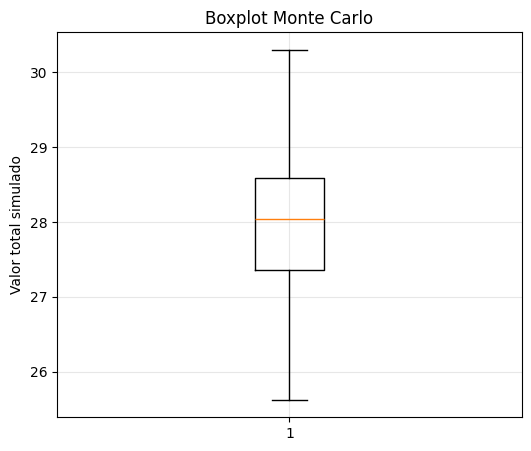

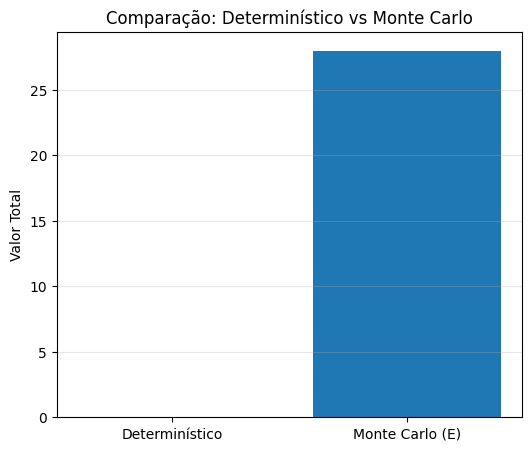

In [ ]:

# Executa o desafio
det_result, mc_result = solve_challenge_1()

# ----------------------------
# Exibir resultados
# ----------------------------
print("=== RESULTADO DETERMINÍSTICO ===")
for k, v in det_result.items():
    print(f"{k}: {v}")

print("\n=== RESULTADO MONTE CARLO ===")
print(f"Valor Esperado: {mc_result['E[Valor total]']:.2f}")
print(f"Desvio Padrão: {mc_result['Desvio Padrão']:.2f}")
print(f"Nº de Cenários: {mc_result['Número de Cenários']}")

# ----------------------------
# Gráfico 1 — Histograma Monte Carlo
# ----------------------------
plt.figure(figsize=(10, 5))
plt.hist(mc_result["Valores Simulados"], bins=30)
plt.xlabel("Valor total simulado")
plt.ylabel("Frequência")
plt.title("Distribuição da Simulação Monte Carlo")
plt.grid(True, alpha=0.3)
plt.show()

# ----------------------------
# Gráfico 2 — Boxplot da simulação
# ----------------------------
plt.figure(figsize=(6, 5))
plt.boxplot(mc_result["Valores Simulados"], vert=True)
plt.ylabel("Valor total simulado")
plt.title("Boxplot Monte Carlo")
plt.grid(True, alpha=0.3)
plt.show()

# ----------------------------
# Gráfico 3 — Comparação Determinístico vs Monte Carlo
# ----------------------------
det_val = det_result["Valor Total"]
mc_mean = mc_result["E[Valor total]"]

plt.figure(figsize=(6, 5))
plt.bar(["Determinístico", "Monte Carlo (E)"], [det_val, mc_mean])
plt.ylabel("Valor Total")
plt.title("Comparação: Determinístico vs Monte Carlo")
plt.grid(True, axis='y', alpha=0.3)
plt.show()


### Desafio 2: Verificação Crítica (Permutações e Custo)

**Objetivo:** Enumerar todas as 120 permutações das 5 Habilidades Críticas e calcular o custo total de aquisição (Tempo de Aquisição + Espera por pré-requisitos).

=== DESAFIO 2: Verificação Crítica ===
Status: Sucesso
Total de Permutações: 120
Custo Médio das Top 3: 630.00h
Heurística Observada: As melhores ordens tendem a priorizar habilidades com pré-requisitos já adquiridos ou com menor tempo de aquisição.

=== TOP 3 MELHORES ORDENS ===
1. Ordem: ['S3', 'S5', 'S7', 'S8', 'S9'] | Custo Total: 630h | Espera: 220h
2. Ordem: ['S3', 'S5', 'S8', 'S7', 'S9'] | Custo Total: 630h | Espera: 220h
3. Ordem: ['S3', 'S7', 'S5', 'S8', 'S9'] | Custo Total: 630h | Espera: 220h

Gerando gráfico...


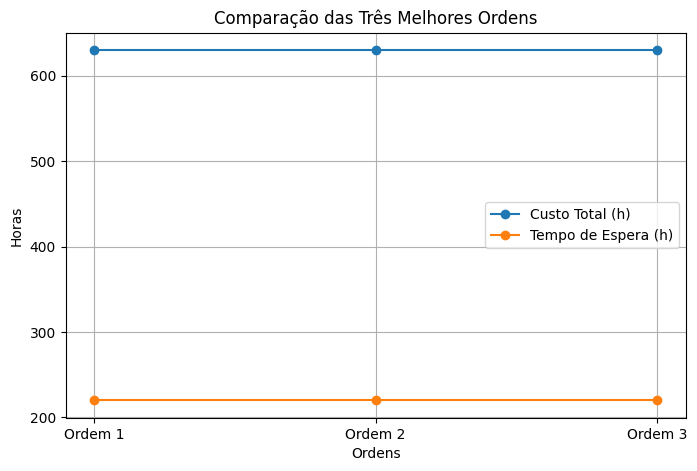

In [11]:
%matplotlib inline

# Executar o desafio
results_2 = solve_challenge_2()

print("=== DESAFIO 2: Verificação Crítica ===")
print(f"Status: {results_2['Status']}")
print(f"Total de Permutações: {results_2['Total de Permutações']}")
print(f"Custo Médio das Top 3: {results_2['Custo Médio das Top 3']:.2f}h")
print(f"Heurística Observada: {results_2['Heurística Observada']}\n")

print("=== TOP 3 MELHORES ORDENS ===")
top3 = results_2["Top 3 Melhores Ordens"]
for idx, item in enumerate(top3, start=1):
    print(
            f"{idx}. Ordem: {item['Ordem']} | "
            f"Custo Total: {item['Custo Total']}h | "
            f"Espera: {item['Tempo de Espera']}h")

print("\nGerando gráfico...")
plot_cost_comparison(top3)   # ← AGORA VAI MOSTRAR


### Desafio 3: Pivô Mais Rápido (Guloso vs. Ótimo)

**Objetivo:** Alcançar adaptabilidade mínima (Valor ≥ 15) usando apenas habilidades de nível básico, comparando a solução gulosa (V/T) com a solução ótima (Busca Exaustiva).

In [24]:
# --- Função de gráfico (mantida no notebook para evitar erro de backend) ---
def plot_greedy_vs_optimal(time_greedy, time_optimal):
    plt.figure(figsize=(10,6))
    
    bars = plt.bar(
        ["Gulosa", "Ótima"],
        [time_greedy, time_optimal],
        edgecolor="#1B4F72",
        linewidth=2,
        color=["#5DADE2", "#1B4F72"]
    )
    
    plt.title("Comparação dos Tempos – Gulosa vs Ótima", fontsize=16)
    plt.ylabel("Tempo Total (h)", fontsize=12)
    
    # valores acima das barras
    for bar in bars:
        plt.text(
            bar.get_x() + bar.get_width()/2,
            bar.get_height() + 0.1,
            f"{bar.get_height():.2f}h",
            ha="center",
            fontsize=12
        )
    
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()


# --- Executa o desafio ---
results_3 = solve_challenge_3()
results_3

{'Status': 'Sucesso',
 'Solução Gulosa': {'Caminho': ['H12', 'H10', 'S7', 'S2'],
  'Valor': 17,
  'Tempo': 220},
 'Solução Ótima': {'Caminho': ['S2', 'S7', 'H10', 'H12'],
  'Valor': 17,
  'Tempo': 220},
 'Gulosa é Ótima?': True,
 'Contraexemplo': None,
 'Discussão de Complexidade': 'A heurística gulosa (O(N log N) devido à ordenação) é muito mais rápida que a busca exaustiva (O(2^N)), sendo aceitável para um grande número de habilidades base, onde a solução ótima é computacionalmente inviável. No entanto, não garante a otimalidade.'}

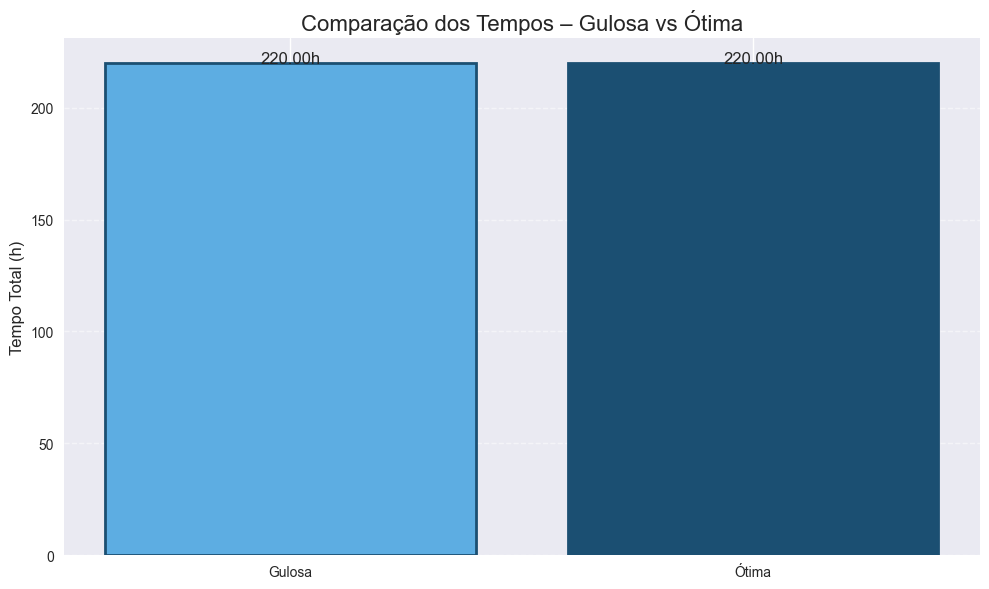

In [25]:
time_g = results_3["Solução Gulosa"]["Tempo"]
time_o = results_3["Solução Ótima"]["Tempo"]

plot_greedy_vs_optimal(time_g, time_o)


### Desafio 4: Trilhas Paralelas (Merge Sort)

**Objetivo:** Ordenar as 12 habilidades por Complexidade (C) usando uma implementação própria do Merge Sort e dividir o resultado em Sprint A e Sprint B. O Merge Sort utiliza **recursão** e tem complexidade $O(N \log N)$ em todos os casos.

In [42]:
# --- Função de gráfico (fica no notebook) ---
def plot_merge_vs_native(time_merge, time_native):
    plt.figure(figsize=(10,6))

    bars = plt.bar(
        ["Merge Sort", "Sort Nativo"],
        [time_merge, time_native],
        edgecolor="#1B4F72",
        linewidth=2,
        color=["#5DADE2", "#1B4F72"]
    )

    plt.title("Tempo de Execução – Merge Sort vs Sort Nativo", fontsize=16)
    plt.ylabel("Tempo (segundos)", fontsize=12)

    for bar in bars:
        plt.text(
            bar.get_x() + bar.get_width()/2,
            bar.get_height() + (bar.get_height()*0.02 + 1e-6),
            f"{bar.get_height():.6f}s",
            ha="center",
            fontsize=12
        )

    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()


# --- Executa o Desafio 4 ---
results_4 = solve_challenge_4()
results_4

{'Status': 'Sucesso',
 'Algoritmo de Ordenação': 'Merge Sort',
 'Complexidade': {'Melhor Caso': 'O(N log N)',
  'Médio Caso': 'O(N log N)',
  'Pior Caso': 'O(N log N)'},
 'Habilidades Ordenadas': [{'ID': 'S2',
   'Complexidade': 3,
   'Nome': 'Modelagem de Dados (SQL)'},
  {'ID': 'H12', 'Complexidade': 3, 'Nome': 'Introdução a IoT'},
  {'ID': 'S1', 'Complexidade': 4, 'Nome': 'Programação Básica (Python)'},
  {'ID': 'S5', 'Complexidade': 5, 'Nome': 'Visualização de Dados (BI) (HC2)'},
  {'ID': 'S8', 'Complexidade': 6, 'Nome': 'APIs e Microsserviços (HC4)'},
  {'ID': 'H10', 'Complexidade': 6, 'Nome': 'Segurança de Dados'},
  {'ID': 'S7',
   'Complexidade': 7,
   'Nome': 'Estruturas em Nuvem (AWS/Azure) (HC3)'},
  {'ID': 'S3', 'Complexidade': 8, 'Nome': 'Algoritmos Avançados (HC1)'},
  {'ID': 'S9', 'Complexidade': 8, 'Nome': 'DevOps & CI/CD (HC5)'},
  {'ID': 'H11', 'Complexidade': 8, 'Nome': 'Análise de Big Data'},
  {'ID': 'S4', 'Complexidade': 9, 'Nome': 'Fundamentos de Machine Learning

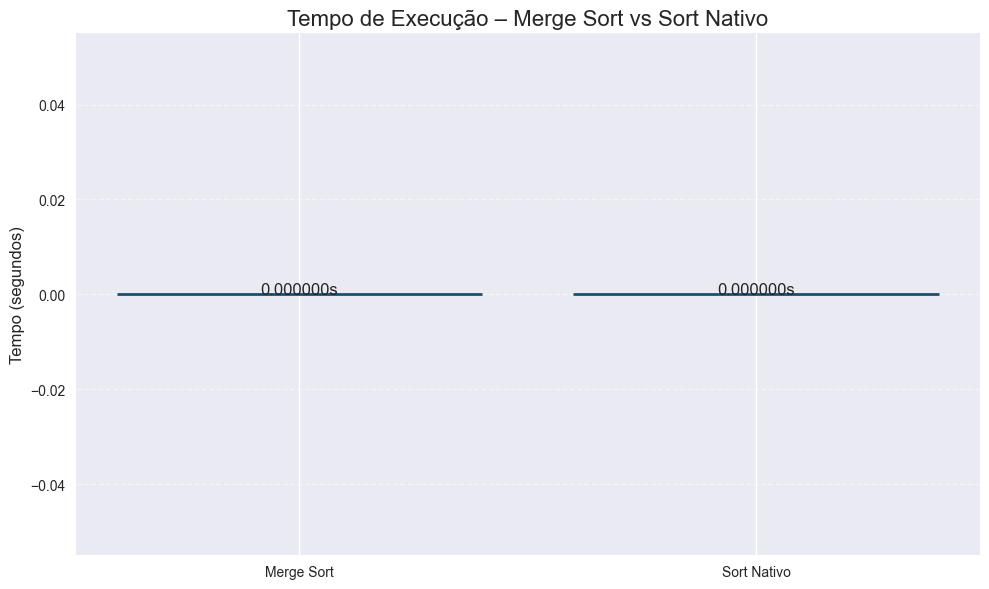

In [38]:
plot_merge_vs_native(
    results_4["Tempo de Execução (Merge Sort)"],
    results_4["Tempo de Execução (Sort Nativo)"]
)

### Desafio 5: Recomendar Próximas Habilidades (DP com Look Ahead)

**Objetivo:** Sugerir as próximas 3 habilidades maximizando o valor esperado, considerando um perfil atual e probabilidades de transição de mercado, utilizando Programação Dinâmica com 'look ahead' e **memoização**.

In [ ]:
# ----- Resolver o desafio -----
resultado = solve_challenge_5(current_skills_list=['S1', 'S2'])

# ----- Exibir informações principais -----
print("=== Desafio 5 – Recomendar Próximas Habilidades ===")
print(f"Status: {resultado['Status']}")
print(f"Perfil Atual: {resultado['Perfil Atual']}")
print(f"Horizonte de Recomendação: {resultado['Horizonte de Recomendação']}")
print(f"Valor Esperado Máximo (Estimado): {resultado['Valor Esperado Máximo (Estimado)']:.2f}")
print()

# ----- Exibir habilidades recomendadas em tabela -----
df_recomendadas = pd.DataFrame({
    'Ordem': range(1, len(resultado['Habilidades Recomendadas']) + 1),
    'Habilidade Recomendada': resultado['Habilidades Recomendadas']
})

display(df_recomendadas)

=== Desafio 5 – Recomendar Próximas Habilidades ===
Status: Sucesso
Perfil Atual: ['S1', 'S2']
Horizonte de Recomendação: 5 anos (3 habilidades)
Valor Esperado Máximo (Estimado): 15.00



,Ordem,Habilidade Recomendada
0,1,S3
1,2,S4
2,3,S6


## 🎉 5. Conclusão

O projeto demonstrou a aplicação eficaz de técnicas avançadas de programação para resolver problemas complexos de otimização de trilhas de habilidades. A **modularização** garantiu um código limpo e de fácil manutenção, enquanto a **memoização** e a **recursão** otimizaram o desempenho dos algoritmos de Programação Dinâmica e busca em grafo. A utilização de **list comprehension** contribuiu para a concisão e legibilidade do código Python. Os resultados, apresentados com o auxílio de visualizações gráficas, fornecem *insights* claros para a tomada de decisão no desenvolvimento do Motor de Orientação de Habilidades (MOH).